# CO2 Emission Analysis and Prediction

## PART 3 : Modelling Notebook

### AiGlass 
`Seeing Through Data`

© Explore AI

---
<img src="https://ezdatamunch.com/wp-content/uploads/2020/04/data-modeling.png" width=70%/>


**Warning:** We are not climate scientists, some things may be inaccurate. This is simply just a study on a subject we are interested in, allowing us to go deeper into the subject while at the same time improving our graphing and prediction skills. All my sources are at the bottom of the notebook.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading & Data Preparation</a>

<a href=#three>3. Modelling</a>

<a href=#four>4. Model Performance</a>

<a href=#five>5. Model Explanations & Interrogation</a>

<a href=#six>6. Conclusion</a>

<a href=#seven>Reference</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, we will be importing libraries used throughout our analysis and modelling, allowing us to call functions that are not part of our main python program.

---

In [1]:
# Libraries for Anaysis
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import math

# Libraries for Plotting Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Setting Plot Design 
sns.set_style("darkgrid", {"axes.facecolor": "#eff2f5", 'grid.color': '#c0ccd8', 
                           'patch.edgecolor': '#B0B0B0', 'font.sans-serif': 'Verdana'})
sns.set_palette('Dark2_r')
plt.rc('font', size=19)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('figure', titlesize=24)

# Extra Plotting Tools Required for Bar Chart Race
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML


# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split    # To split the data into training and testing data
from sklearn.preprocessing import StandardScaler        # For standardizing features
from sklearn.linear_model import LinearRegression       # For the LINEAR Model from Sklearn
from sklearn.linear_model import Ridge                  # For the RIDGE Regression module from sklearn
from sklearn.linear_model import Lasso                  # For the LASSO Model from Sklearn
from sklearn.model_selection import GridSearchCV        # To sort out our Hyper_Parameters
from sklearn.tree import DecisionTreeRegressor          # For the Decision-Tree Model
from sklearn.ensemble import RandomForestRegressor      # For the RandomForest Model
import xgboost as xgb                                   # For the xgBoost Model
from sklearn.svm import SVR

# Libraries for calculating performance metrics
from sklearn.metrics import mean_squared_error          # Apply np.sqrt MSE to get RMSE
import time                                             # For Calulating ALgo Time Run

# Libraries to Save/Restore Models
import pickle

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading & Data Preparation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, we will be loading the data from the CSV and EXCEL files into Pandas DataFrames, which is a 2-dimensional data structure, like a 2-dimensional array, or a table with rows and columns. |

---

In [2]:
# Load Base Data
df = pd.read_csv("data/Our_CO2emission_Modelling_Data.csv")

In [3]:
# View first 5 rows of Loaded Base Data
df.head()

Unnamed: 0  e_type  e_con  e_prod   GDP  Population  ei_capita  ei_gdp  \
0        1951       4   0.00     0.0  0.98       62.53      95.45    6.07   
1        1952       2   0.00     0.0  0.98       62.53      95.45    6.07   
2        1953       3   0.01     0.0  0.98       62.53      95.45    6.07   
3        1954       1   0.00     0.0  0.98       62.53      95.45    6.07   
4        1955       0   0.00     0.0  0.98       62.53      95.45    6.07   

   pop_growth  pop_density  Manuf_GDP  Agric_GDP  Deforestation  \
0       0.845       142.12   0.024676   0.017454       101.0988   
1       0.845       142.12   0.024676   0.017454       101.0988   
2       0.845       142.12   0.024676   0.017454       101.0988   
3       0.845       142.12   0.024676   0.017454       101.0988   
4       0.845       142.12   0.024676   0.017454       101.0988   

   emission_per_cap  CO2_emission  
0          0.000000           0.0  
1          0.000000           0.0  
2          0.006397           0.4  
3          0.000000           0.0  
4          0.000000           0.0

In [4]:
# Drop Unamed Column
df = df.drop('Unnamed: 0', axis=1)

In [5]:
# Check shape
df.shape

(22779, 14)

In [6]:
# Extracting features and label; Readying for Split 
X = df.drop(['CO2_emission'], axis=1)
y = df['CO2_emission']

In [7]:
# Standardize/Scale our Dataset
scaler = StandardScaler() # create scaler object

# convert the scaled predictor values into a dataframe
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

<a id="three"></a>
## 3. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we will be applying several machine learning models, trained over a set of data to recognize certain types of patterns, reasoning over and learning from those data. The aim is to have a Model which is able to accurately predict CO2 Emissions based on some relevant features. |

---
We will be Modelling with the Following;
1. Base Models (linear regressions);
    * Linear Regression (It targets predicting value based on independent variables)
    * Ridge Regression (A regressional model tuning method that is used to analyse any data that suffers from multicollinearity)
    * Lasso Regression (A type of linear regression that uses the shrinkage method, where data values are shrunk towards a central point, like the mean)

2. Tree-Based Models;
    * Decision Tree (The data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.)
    * Random Forest (It builds decision trees on different samples and takes their majority vote for classification and average in case of regression)
    * XGBoost (Extreme Gradient Boosting machine is a scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed.)

3. Glass Box Modelling Approach (all the features and the model parameters are known as means of Model check.)

4. Bias Model (Used to Interrogate our model/Training process for Bias, describing how well our model matches the training set)


In [8]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, shuffle=False, random_state=42)

In [9]:
# creating one or more ML models

# Creating linear model
lm = LinearRegression()

# Creating ridge model
ridge = Ridge()

# Creating LASSO model object, setting alpha to 0.01
# Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square
lasso = Lasso(alpha=0.01) 

# Creating Decision Tree model with a max depth of 5 
DT = DecisionTreeRegressor(max_depth=5)

# Our forest consists of 100 trees with a max depth of 5 
RF = RandomForestRegressor(n_estimators=100, max_depth=5)

#create Xgboost
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.1,
                max_depth = 5, alpha = 6, n_estimators = 100, subsample = 0.7)  

In [10]:
# Fit the Ml model
lm.fit(x_train, y_train)             # Linear Regression
ridge.fit(x_train, y_train)          # Ridge Regression
lasso.fit(x_train, y_train)          # Lasso Regression
DT.fit(x_train, y_train)             # Decission Tree
RF.fit(x_train, y_train)             # Random Forest
xgb_reg.fit(x_train, y_train)        # XGBoost gbtree

XGBRegressor(alpha=6, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=6, ...)

In [11]:
# evaluate one or more ML models [Getting Predictions]
y_pred_lm = lm.predict(x_test)
y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_DT = DT.predict(x_test)
y_pred_RF = RF.predict(x_test)
y_pred_xgb = xgb_reg.predict(x_test)

<a id="four"></a>
## 4. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we will be comparing the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. The Root mean square error or root mean square deviation, which is one of the most commonly used measures for evaluating the quality of predictions will be adopted to reach this decision. RMSE shows how far predictions fall from measured true values using Euclidean distance. |

---

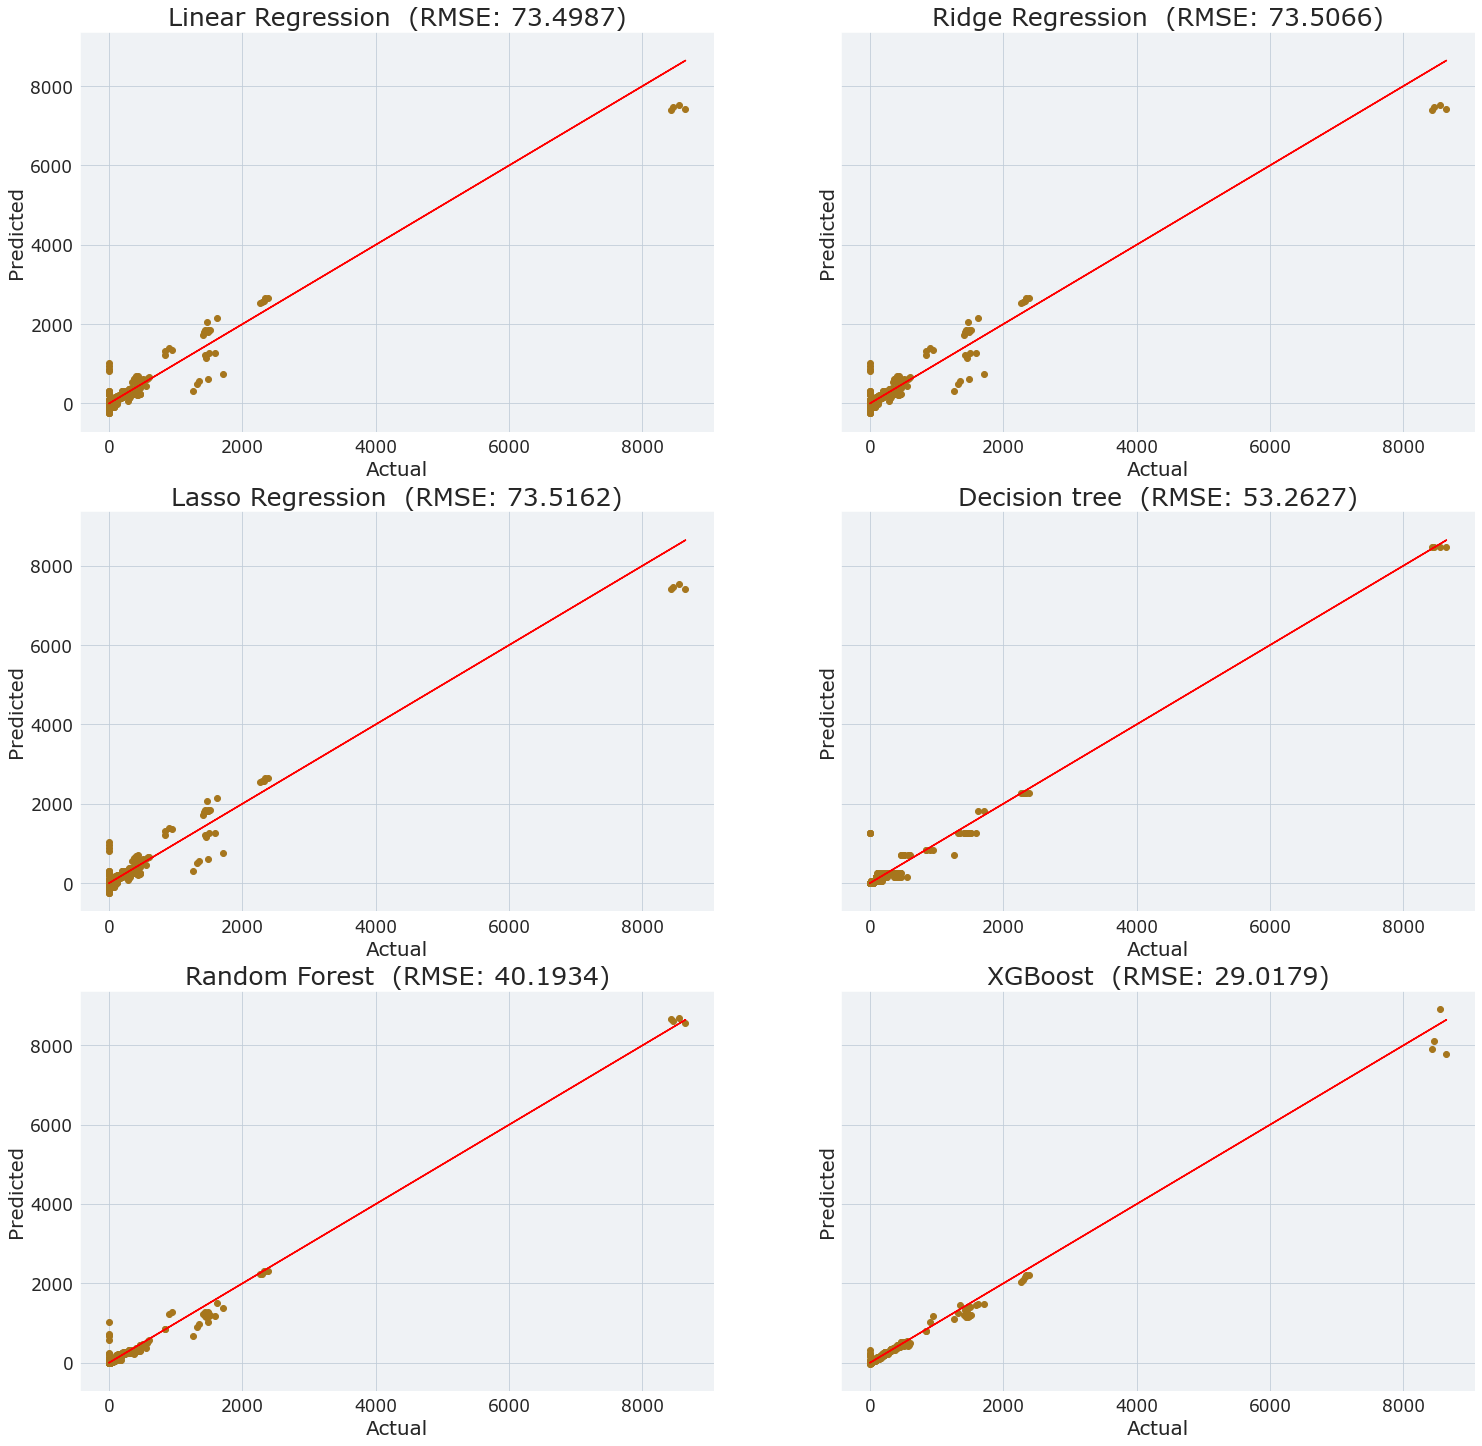

In [12]:
# Compare model performance

# Create figure and axes
f, ax = plt.subplots(figsize=(25,25), nrows=3, ncols=2, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [y_pred_lm, y_pred_ridge, y_pred_lasso, y_pred_DT, y_pred_RF, y_pred_xgb]
title = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
         'Decision tree', 'Random Forest', 'XGBoost']
ax = ax.flatten()
# Loop through all axes to plot each model's results 
for i in range(6):
    rmse = round(np.sqrt(mean_squared_error(pred[i], y_test)), 4)
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test,'r')
    ax[i].scatter(y_test, pred[i]) 

In [13]:
# Understanding the Impact of RMSE in comparison to the Range of our Target Variable
Target_range = df['CO2_emission'].max() - df['CO2_emission'].min() 
Absolute_RMSE_XGB = (np.sqrt(mean_squared_error(y_pred_xgb, y_test)/ Target_range))
# Divided MSE by Range to get MSE @ 0 to 1, Then got RMSE by sqrt(MSE)
# 9113.56
round(Absolute_RMSE_XGB, 3)

0.304

### Observation:
**Based on Model Accuracy** We can confidently say;
    1. Tree-Based Modelling is best suited for this dataset
    2. That the Tree-Based Model (XGBoost) has outdone the other models with a Root Mean Square Error of `29.018`. Our CO2 Emission has a range of `0 to 9113`, hence For this datum, an RMSE of 29 is Very small and Well Acceptable. Meaning, scaling it in the range of 0 to 1, the RMSE is at `0.304`, which is close to Zero, which is a good result.

Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. `It shows how far predictions fall from measured true values using Euclidean distance.` Hence our Close to Zero Value is a Very Good Result.


<a id="five"></a>
## 5. Model Explaination & Interrogation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model Explaination & Interrogation⚡ |
| :--------------------------- |
| In this section, haven obtained our best Model based on Accuracy (RMSE), it is very essential we also determine the Interpretability of our model. The development of ML/AI is creating new opportunities & possibilities, improving lives around the globe but on the other hand, it's raising concerns/questions on the best way to build` Fairness, Explainability, Privacy, and Security` into the systems, 
    * Fairness: Speaks of understanding the reasons behind the WHY of predictions, treating all users fairly
    * Explainability: Which is the HOW of the WHY

All in the bid to answer questions such as;

    1. What features are most important
    2. Which is influencing what
    3. Which Feature is important for class A or Class B. 

The choice of Explainer is greatly dependent on the `Data Type`, Hence, We will be adopting the  `Glass Box Modelling Technique` in the bid to understand the criteria used by the model to reach its prediction results and conclusion.

`We also will be interrogating for any inconsistencies or contradictions from what our ExExplanationays.`
|

---
<img src = 'https://miro.medium.com/max/1400/1*ptwDO6s4kd8bLghuE1Amsg.png' width=50%/>

Sometimes knowing exactly how a model comes to its decisions is very important, and `sometimes favoring explainability, is far appreciated than accuracy`. Hence, Selecting the appropriate technique is very dependent on the kind of problem you want to solve. Some problems require more explainability than others regarding which features it finds important or even what it looks at. In some cases, it is not terribly important for humans to fully understand how the model works or how it reaches its decisions. But where this need exists, we look at several techniques to help humans better understand how the model comes to its predictions.


<AxesSubplot:xlabel='Feature'>

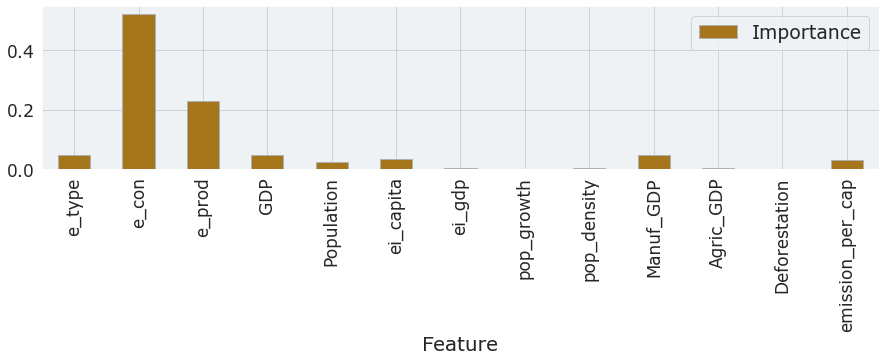

In [14]:
'''
1. What features are most important: Let's start HERE
this will be based on Weight 
i.e The number of times a feature is used to split the data across all trees.
'''

# CALCULATING FEATURE IMPORTANCE
imp_df = pd.DataFrame(
    {'Feature': X_scaled.columns,
     'Importance': xgb_reg.feature_importances_
    })

# plotting a bar graph
imp_df.plot(x="Feature", y="Importance", kind="bar", figsize=(15, 3 ))

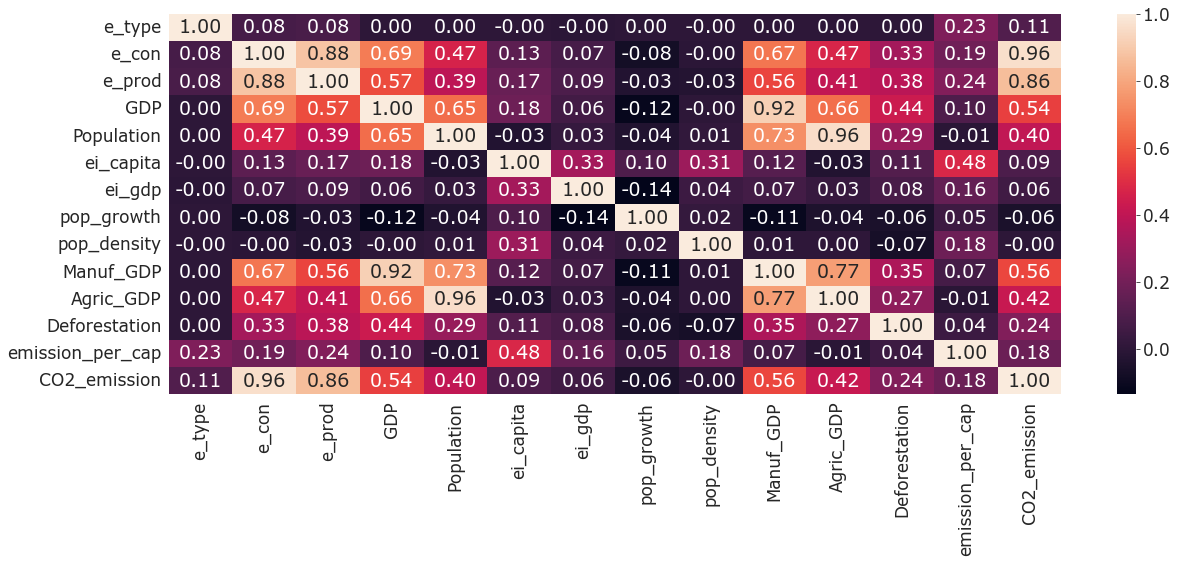

In [15]:
# Also Considering & evaluating Feature correlation Using HeatMap
plt.figure(figsize=(20,7))
sns.heatmap(data=df.iloc[:,:].corr(), annot=True, fmt='.2f')
plt.show()

### Observation:
From the above,  We can see the few Significantly Influencing Features from the thirteen (13);
1. Energy Type
2. Energy Consumption
3. Energy Production
4. GDP
5. Population
6. Energy Intensity per Capita
7. Manufacturing GDP
8. Agricultural GDP
9. Emission_per_capita

`Also, Considering the Heat Map;` We can see a Heavy correlation between `Energy Consumption & Energy Production` and `GDP & Population vs (Manufacturing GDP, Agricultural GDP, Deforestation)`;
* We won't Drop Energy Production even though it correlates with Energy Consumption, simply because, if a country consumes an energy type, it doesn't mean it is producing it, Hence There may be Countries with Consumption but with Low Production.
* We will be dropping the None Influencing features such as `ei_gdp, pop_growth, pop_density, Deforestation`
* We will be Dropping `Population and Agric_GDP` due to Multi-Collinearlity issues, and then Remodelling

In [16]:
############# Remodelling with Essential Features ####################

# Drop Non-Essentials
new_df = df.drop(['Agric_GDP', 'ei_gdp', 'pop_growth', 'pop_density', 'Deforestation', 'Population'], axis=1)

# Extracting features and label; Readying for Split 
X_new = new_df.drop(['CO2_emission'], axis=1)
y_new = new_df['CO2_emission']

# convert the scaled predictor values into a dataframe
X_scaled_new = pd.DataFrame(scaler.fit_transform(X_new), columns=X_new.columns)

# splitting data
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_scaled_new, 
                                                                    y_new, test_size=0.15, 
                                                                    shuffle=False, random_state=42)

# Using Best Linear Reg & Tree Model

# Creating linear model
lm_new = LinearRegression()
# create Xgboost
"""
Since your target is a count variable, it's probably best to model this as a Poisson regression. 
xgboost accommodates that with objective='count:poisson'
"""
xgb_reg_new = xgb.XGBRegressor(objective='count:poisson', colsample_bytree=0.6, learning_rate=0.1,
                max_depth=3, alpha=6, n_estimators=600, subsample=0.7) #'reg:squarederror'

# Train Model
lm_new.fit(x_train_new, y_train_new)
xgb_reg_new.fit(x_train_new, y_train_new)

XGBRegressor(alpha=6, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0.699999988, max_depth=3, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=0, num_parallel_tree=1,
             objective='count:poisson', predictor='auto', random_state=0, ...)

In [17]:
######## Adding and Esemble Model to see If we will have an Improved Model #########
from sklearn.ensemble import StackingRegressor

# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("LR",lm_new), ("XGB",xgb_reg_new)]

# Instead of choosing model weightings, we now declare the meta learner 
# model for our stacking ensemble. 
# Here we choose to use a simple linear regression 
meta_learner_reg = LinearRegression()

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

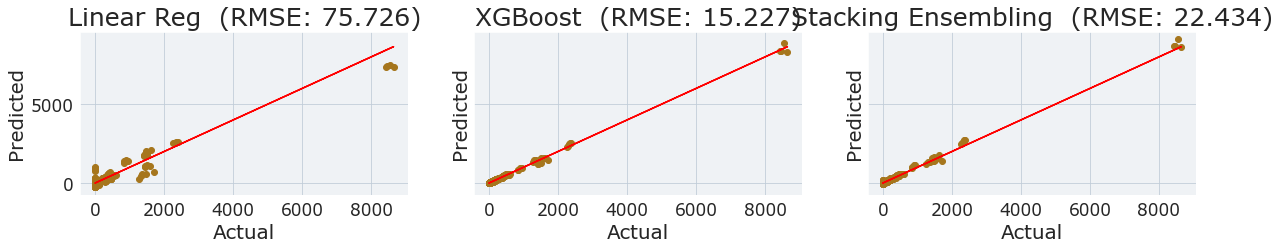

In [18]:
# Training Models
lm_new.fit(x_train_new, y_train_new)
xgb_reg_new.fit(x_train_new, y_train_new)
s_reg.fit(x_train_new, y_train_new)

# evaluate one or more ML models [Getting Predictions]
y_pred_lm_new = lm_new.predict(x_test_new)
y_pred_xgb_new = xgb_reg_new.predict(x_test_new)
y_pred_sreg_new = s_reg.predict(x_test_new)

# Compare model performance
f, ax = plt.subplots(figsize=(20,3), nrows=1, ncols=3, sharey=True) # Create figure and axes
# Create list of titles and predictions to use in for loop
pred = [y_pred_lm_new,  y_pred_xgb_new, y_pred_sreg_new]
title = ['Linear Reg','XGBoost', 'Stacking Ensembling']
ax = ax.flatten()
# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i], y_test_new)), 3)
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test_new, y_test_new,'r')
    ax[i].scatter(y_test, pred[i]) 

In [19]:
Abs_RMSE_XGB = (np.sqrt(mean_squared_error(y_pred_xgb_new, y_test_new)/ Target_range))
# Divided MSE by Range to get MSE @ 0 to 1, Then got RMSE by sqrt(MSE)
# Range 0 to 9113.56
Abs_RMSE_XGB

0.15950022626436994

XGBoost still performs Best haven narrowed our dataset to the essentials, with an RMSE of 15.227 i.e `RMSE = 0.16 at Range 0 to 1`. This is truly an Excellent result with Just Seven Essential Features `'e_type', 'e_con', 'e_prod', 'GDP', 'ei_capita', 'Manuf_GDP', 'emission_per_cap'`

Our Model improved from RMSE `0.3` to `0.1`

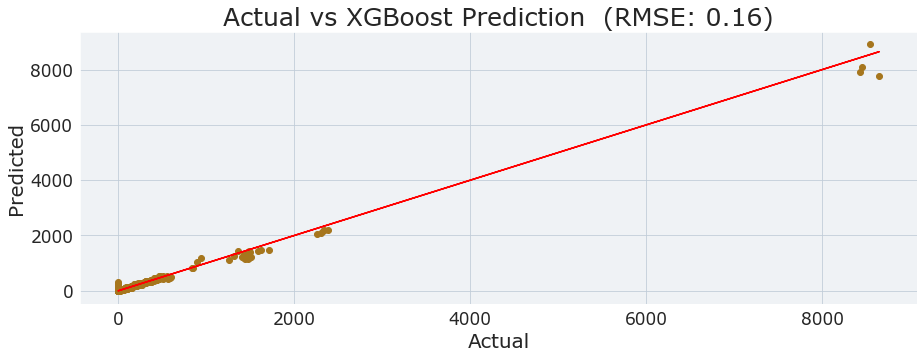

([<matplotlib.lines.Line2D at 0x25b41276e80>], None)

In [20]:
# Blowwing Up the Plot of BEST model
f, ax = plt.subplots(figsize=(15,5)) # Create figure and axes
# Plot on axes
ax.set_title('Actual vs XGBoost Prediction'+"  (RMSE: "+str(round(Abs_RMSE_XGB, 2))+ ")")
ax.set_xlabel('Actual'), ax.set_ylabel('Predicted')
ax.scatter(y_test, y_pred_xgb)
ax.plot(y_test, y_test,'r'), plt.show()

### Observation
As you can see, Our models prediction below 1000(MMtonnes CO2) will give lower variation as compared to above 8000 (MMtonnes CO2). This means, `Our model’s variation from the Actual will tend to increase with an increase in the Target Outcome (CO2 Emission)`. This Statement is not Absolute as we can see some variations going contrary. This means Our Model is doing well to capture possible variation in the INPUT VALUES from the Features.

<AxesSubplot:xlabel='Feature'>

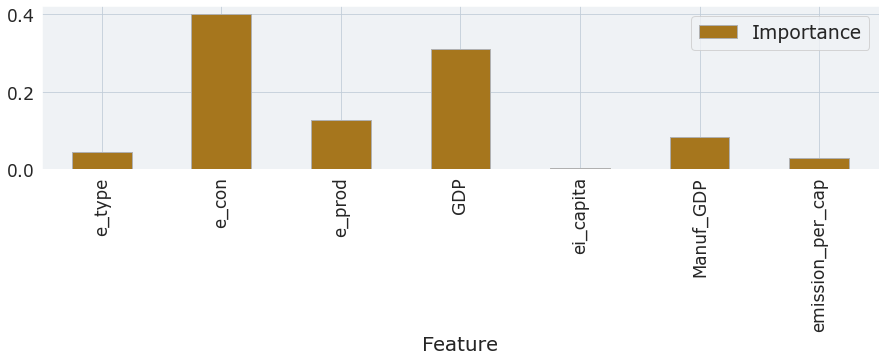

In [21]:
# Graphical Representation of FEATURE IMPORTANCE
imp_df_new = pd.DataFrame(
    {'Feature': X_scaled_new.columns,
     'Importance': xgb_reg_new.feature_importances_
    })
# plotting a bar graph
imp_df_new.plot(x="Feature", y="Importance", kind="bar", figsize=(15, 3 ))

We can see also From the Most Influencing Feature by Weightage to the least and how our model will tend to attribute importance to the Features. 
* Energy Consumption: Proves to be the Highest Influencer, which makes sense, as if an Energy is in its unused state (Potential Energy), It will definitely not be oozing out CO2 except when Used/Exspended (Kinetic)
* There is also bound to be more Economic activity with places of High GDP and by that, more energy is more likely to be consumed within that vicinity, Thus our Model is doing Just right paying attention to this as its second most important requirement.
* The rest in their Order; `Energy Production, Manufacturing Contribution to GDP of a Place, Energy Type & Emission per Capita Index of a place` clearly shows our model is clearly in order.

##### Let's Visualise in comparison the Actual Target Value and our Model Prediction


In [22]:
# Get list of Models prediction for Test dataset
f = []
for x in range(len(y_test_new)):
    f.append(y_pred_xgb_new[x])
# Place in Dataframe
f_df = pd.DataFrame(list(zip(y_test_new, [round(num, 2) for num in f])), 
                    columns =['Actual', 'Predicted Value'])
# Cal varience of Prediction from Actual
f_df['Varience'] = round((f_df['Actual'] - f_df['Predicted Value']), 2)
f_df.head(20) # print first 20 Observation

Actual  Predicted Value  Varience
0     0.00         0.000000      0.00
1     0.00         0.000000      0.00
2   375.21       360.529999     14.68
3     9.32         9.680000     -0.36
4    86.86        81.070000      5.79
5     0.00         0.000000      0.00
6     0.00         0.000000      0.00
7     0.00         0.000000      0.00
8     0.00         0.000000      0.00
9     1.62         2.070000     -0.45
10    0.00         0.000000      0.00
11    0.00         0.000000      0.00
12   44.79        54.590000     -9.80
13   55.42        55.740002     -0.32
14  174.35       181.270004     -6.92
15    0.00         0.000000      0.00
16    0.00         0.000000      0.00
17    3.99         5.670000     -1.68
18    0.00         0.000000      0.00
19   15.48        17.350000     -1.87

NOW: How did our Model come to it's decision i.e answering questions 2 & 3 on our Data explanation

    2. Which is influencing what
    3. Which Feature is important for class A or Class B. 
    
We will be doing this using the SHAP method since our Best Model is a Tree-Based Regressor

### Explaining predictions using SHapley Additive exPlanations (SHAP)

Here we will be using the Tree SHAP implementation integrated into XGBoost to explain the Model with Complete Features (Entire Dataset) & then on our Enhanced BEST Model (data containing the selected features of importance). 

`NOTE: Since we train split the data, and we will be using the X_train Samples (19362 Train samples).`

SHapley Additive exPlanations (SHAP) is a practical method based on `Shapley values which is an instance-based explaining method derived from coalitional game theory.`

    Assume playing a game of predicting the score of a student. Each feature value of such student ‘plays’ the game by contributing to the model. How do we know the contribution of each feature to the prediction result? We can calculate the Shapley values to distribute the ‘payout’ among the feature values fairly. https://www.justintodata.com/explainable-machine-learning-with-python/
    
This is what we hope to do, and as you can imagine, as the number of features increases, the number of possible coalitions increases exponentially, resulting in a computation increase. Hence, approximating the Shapley values, rather than applying the exact calculations is preferred. This is one of the major reasons why we choose to apply SHAP. 

SHAP includes an estimation approach of Shapley values, but more than that. Besides being an instance-based method to explain one instance, SHAP also contains methods of combining the Shapley values of all instances to summarize the model predictions. Let’s use the TreeExplainer function from shap and make a summary plot since our best Model in terms of accuracy is the XGBoost – an ensemble of trees.. 

The explainable machine learning methods can be of two main categories:
* Summary-based: explain the average behavior of the model
* Instance-based: explain the individual instance’s prediction


In [26]:
import shap
# print the JS visualization code to the notebook
shap.initjs()

### Summary-based Explanation

So on the below SHAP beeswarm summary plot, we can see both feature importances and the effects on the predictions. Each point marks a SHAP value for a feature per CO2 Emitted:

Along the y-axis, the features are sorted from top to down by the sum of SHAP value magnitudes of all instances
Along the x-axis, for each feature, you can also see the distribution of the impacts each feature has on the model’s predictions

The color of dots represents the values of the features: red high and blue low

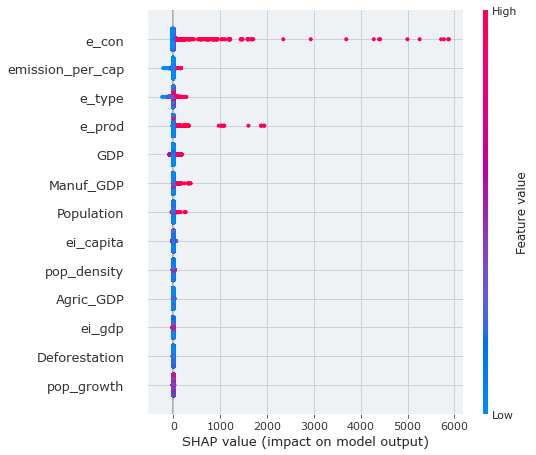

In [31]:
'''
For Our Models Behaviour when all Features are present 
'''
explainer_entire_data = shap.TreeExplainer(xgb_reg)
shap_values_entire = explainer_entire_data.shap_values(x_train)
shap.summary_plot(shap_values_entire, x_train)# Plotting Summary Plot

On the General scale, we can see that `Energy Consumption` is the most important relevant feature for our model. The higher values of Energy Consumption[e_con] (red dots) tend to contribute absolute positively to the prediction while the lower values (blue dots) have a near ZERO contribution. This makes sense since the more Energy Consumed especially for non-renewables & fossil fuels, the more chances of emitting CO2.

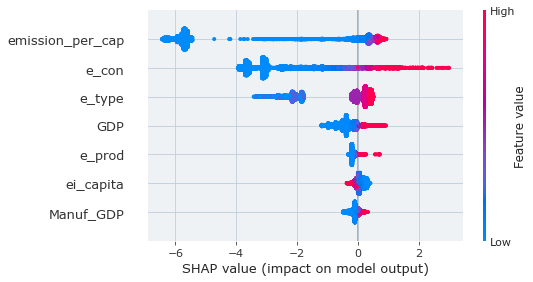

In [32]:
'''
For Our Enhanced BEST Model Behaviour for essential Features 
'''
explainer_selected_feature = shap.TreeExplainer(xgb_reg_new)
shap_values = explainer_selected_feature.shap_values(x_train_new)
# Plotting Summary Plot
shap.summary_plot(shap_values, x_train_new)

### Observation:
Explaining how of final Model sees Features in order of Impact per CO2 Emitted;
* `Emission per Capita` is the most critical of the Pack. This makes sense but we might question the use of `Emission per Capita` as this feature was derived by a direct division of our Target Variable by the Corresponding countries’ Populations. However, Countries still can make an estimate or even apply their current standings, as this very feature plays a very vital role in the ability of our model to rationalize the combination of other normal features such as Energy Consumption and GDP to make a more precise prediction.
* After which, Energy Consumption remains the next crucial Feature as `The higher values of Energy Consumption[e_con] (red dots) tend to contribute absolutely positively to the prediction while the lower values (blue dots) tend to contribute negatively to the prediction` This makes sense since the more Energy Consumed especially for non-renewables & fossil fuels, the more chances of emitting CO2.
* We can see the Glove between the Red dot and Blue Dot for `Energy Type`. This reveals that our Model understands that they are energy types such as Renewables and Nuclear which no matter Consumption will give a negative contribution and others such as Coal, Petroleum which will give a positive prediction.
* The seems to be a Balance in contribution for GDP, Agric_GDP, e_prod, and Maunfacturing_GDP. `The higher values (red dots) tend to contribute absolutely positively to the prediction while the lower values (blue dots) tend to contribute negatively to the prediction`

So we can say; On a General scale, our Model is performing adequately.

### Instanced-based Explanation

In [33]:
"""
Tried plotting the scatter plot of each individual feature 
so that can see also the focus on one feature’s effect across the entire dataset
"""

# shap.plots.scatter(shap_values[:, "GDP"], color=shap_values)

# I keep getting this error
# IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

'\nTried plotting the scatter plot of each individual feature \nso that can see also the focus on one feature’s effect across the entire dataset\n'

In [34]:
# The Instance Approach for explaining our Model

# shap.plots.waterfall(shap_values[20])

# AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

Let's Do a bit of Confirmation by applying our Enhanced Dataset to the  Explainable Boosting Machine (or EBM for short), a package developed by Microsoft

### Explainable Boosting Machine


The [Explainable Boosting Machine](https://towardsdatascience.com/think-outside-the-black-box-7e6c95bd2234) (or EBM for short) included in the interpretml package developed by Microsoft. It is built on the old technique of Generalized Additive Models with newly added machine learning techniques such as bagging and gradient boosting. During training the EBM only looks at one feature at a time in a round-robin fashion while using a very low learning rate. This way the order of the features does not matter. This process is repeated for many iterations where at the end of training all feature trees are added together. Because the EBM is an additive model each feature contributes separately to the final prediction, it allows us to see which features are important and which are less important. In other words, [Explanable AI](https://towardsdatascience.com/explainable-ai-in-practice-6d82b77bf1a7)

[Explainable Boosting Machine (EBM)](https://interpret.ml/docs/ebm.html) is a tree-based, cyclic gradient boosting Generalized Additive Model with automatic interaction detection. EBMs are often as accurate as state-of-the-art blackbox models while remaining completely interpretable.

In [35]:
# Incase you don't have the module, UnHash & Install
# !pip install interpret  

In [36]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

In [37]:
# Create ebm Model
ebm = ExplainableBoostingRegressor(learning_rate=0.1, min_samples_leaf=3, max_leaves=5, random_state=42, max_rounds=5000)

start = time.time()
ebm.fit(x_train_new, y_train_new) # Fit Model
print(f"Training time: {(time.time()) - start}s")

Training time: 62.733511209487915s


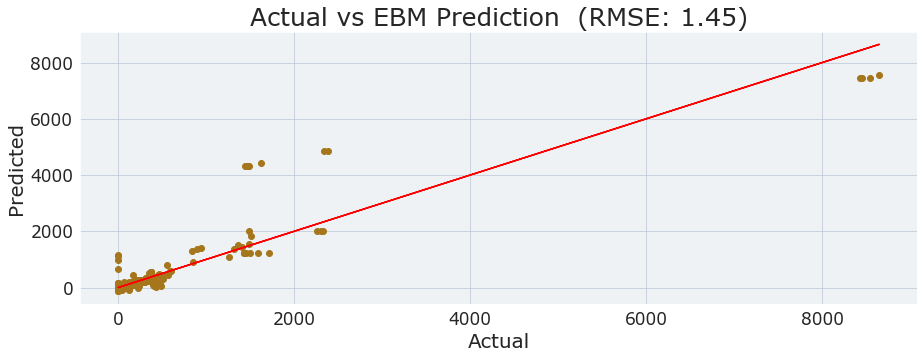

In [52]:
pred = ebm.predict(x_test_new)
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5))
rmse_ebm = round(np.sqrt(mean_squared_error(pred, y_test_new)/Target_range), 3)
# Plot on axes
ax.set_title('Actual vs EBM Prediction'+"  (RMSE: "+str(rmse_ebm)+ ")")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test_new, pred)
ax.plot(y_test_new, y_test_new,'r')
plt.show()

So we see the EBM is not as Accurate as the XGBoost (Our Best Model), but let's see if it will see our Features differently from what XGBoost is doing

In [39]:
ebm_global = ebm.explain_global()
show(ebm_global)

As you can see it's quite similar in comparison of the feature relevance to making decision with Energy Consumption and Emission_per_Capital leading the Pack

In [40]:
'''
RUN: Select what observation you wish to Probe & Interrogate using EBM
'''
ebm_local = ebm.explain_local(x_test_new[:10], y_test_new[:10])
show(ebm_local)

As you can see EBM did poorly with Zero Emission predictions But Comparing it with the test prediction by XGBoost, You'll see why we've concluded on XGboost is our top Model.

In [41]:
# Pint XGBoost Results per Observation
f_df.head(20)

Actual  Predicted Value  Varience
0     0.00         0.000000      0.00
1     0.00         0.000000      0.00
2   375.21       360.529999     14.68
3     9.32         9.680000     -0.36
4    86.86        81.070000      5.79
5     0.00         0.000000      0.00
6     0.00         0.000000      0.00
7     0.00         0.000000      0.00
8     0.00         0.000000      0.00
9     1.62         2.070000     -0.45
10    0.00         0.000000      0.00
11    0.00         0.000000      0.00
12   44.79        54.590000     -9.80
13   55.42        55.740002     -0.32
14  174.35       181.270004     -6.92
15    0.00         0.000000      0.00
16    0.00         0.000000      0.00
17    3.99         5.670000     -1.68
18    0.00         0.000000      0.00
19   15.48        17.350000     -1.87

In [ ]:
"""
Extract / Save Best Model as Pickle File
"""

# save the model
# pickle.dump(xgb_reg_new, open("data/CO2_Emission_Prediction_model.pkl", "wb"))

###  Measuring of Bias and Variance of our BEST Model
Practically it is very difficult and expensive to obtain population data. Without the knowledge of population data, it is not possible to compute the exact bias and variance of a given model. Although the changes in bias and variance can be realized on the behavior of train and test error of a given model.

So, to perform this experiment, we will consider a large dataset to be population. Based on this assumption we will proceed in calculating the bias and variance of the various model on this dataset.

https://www.analyticsvidhya.com/blog/2020/12/a-measure-of-bias-and-variance-an-experiment/

Our Approach to this experiment (Pseudocode) involves:
1. Considering a data set of 22779 Observation as Population_Data
2. Extracting Test_Data of 1.5% records from Population_Data. So, the remaining data is considered to be Training_Data (
3. Build Population_Model using Training_Data and Collect predictions from the Population_Model using Test_Data

    **All Done Above Up to this Point. We will only Declare as Variables**
    
4. Build Mean_Model: `30 random samples extracted from Training_Data. Models are built on each of these samples. The mean predictions using Test_Data of these models are collected.`
5. Compute Model_Bias: `The bias of the model = Mean (abs(Prediction of Population_Model – Prediction of Mean_Model))`
6. Compute Model_Variance: `Model_Variance = Var (Prediction of Mean_Model, Prediction of Sample_Model)`

In [50]:
# Declaring already built variables
Pop_Model = xgb_reg_new            # Population Model
Pop_pred = y_pred_xgb_new          # Population Prediction
Test_data = x_test_new             # 1.5% of Pop data extracted during train/test split

# Join X_train and Y_train prior to getting sample
s_df = pd.concat([x_train_new, y_train_new], axis=1, join='inner')

# Extracting Mean Sample (30 Observation) from Pop training data
mean_sample = s_df.sample(n=30, replace=True)
# Extracting features and label 
X_mean = mean_sample.drop(['CO2_emission'], axis=1)
y_mean = mean_sample['CO2_emission']

In [51]:
# Building Mean Model
xgb_reg_mean = xgb.XGBRegressor(objective='count:poisson', colsample_bytree=0.6, learning_rate=0.1,
                max_depth=3, alpha=6, n_estimators=600, subsample=0.7)
# Train Model
xgb_reg_mean.fit(X_mean, y_mean)
# Get Prediction
Mean_pred = xgb_reg_mean.predict(Test_data)

In [64]:
No_of_Test_Data = len(Test_data)
Model_bais = (abs(Pop_pred - Mean_pred))/No_of_Test_Data
Model_Variance = Pop_pred - Mean_pred

In [99]:
# Place in Dataframe
result = pd.DataFrame(list(zip(y_test_new, Pop_pred, Mean_pred, Model_bais, Model_Variance)), 
                    columns =['Actual','Population Pred', 'Sample Pred', 'Model Bais', 'Model Varience'])
result.head(10)

Actual  Population Pred  Sample Pred  Model Bais  Model Varience
0    0.00         0.000545     0.340977    0.000100       -0.340431
1    0.00         0.000510     0.340977    0.000100       -0.340467
2  375.21       360.529480    16.758236    0.100606      343.771240
3    9.32         9.676902     1.247459    0.002467        8.429443
4   86.86        81.069366    14.529476    0.019473       66.539886
5    0.00         0.000815     0.472454    0.000138       -0.471639
6    0.00         0.000742     0.340786    0.000100       -0.340044
7    0.00         0.002216     0.292787    0.000085       -0.290572
8    0.00         0.001201     0.285949    0.000083       -0.284748
9    1.62         2.072650     0.400625    0.000489        1.672024

In [81]:
# Plot Multiple line graph
fig = px.line(result.tail(100), x=range(0, len(result.tail(100))), y=['Actual','Population Pred', 'Sample Pred', 
                                        'Model Bais', 'Model Varience'], 
               title='Bais vs Varience Trade-off')

fig.show()

In [97]:
print(f"{round((len(mean_sample[mean_sample['CO2_emission'] < 10])/len(mean_sample))*100)} % of Sample has CO2 Emission as Zero")

93 % of Sample has CO2 Emission as Zero


### Observations:
    Our Smaple Model is performing Poorly with Large Emission Prediction and this can be liken to the fact that about 77% of our main dataset is Zero emission and 93% below 10 MMtonnes of CO2 Emission, hence contributing to why we are experiencing a near 100% varience with the sample model for Large Emission Prediction.
    
   The Rest Observation (i.e below 10 MMtonnes prediction) performs at about 3% less than Our Pouplation Model.

<a id="six"></a>
## 5. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Conclusion ⚡ |
| :--------------------------- |
| This section, we will be giving our judgement or decision reached by reasoning of the above experimental analysis. |

---


Conclusively from the Analysis, we can say;
 * CO2 Emission has been increasing throughout the period globally and has seen a decline since 2014.
 * The top CO2 emitters over the entire time period have been China and The United States But in contrast to CO2 Emitted per head/capita, China & the US are doing much better as compared to the UAE, Singapore, and Qatar. 
 * Hence it's entirely wrong to state that the larger the population, the more CO2 the country will be likely to emit. It's more dependent on the Activity, Culture, and policies of a place to reduce the CO2 Emitted per head/capita index.
  * The larger the Energy Consumption of a country, the larger the CO2 emission, which is dependent on the prevalent Energy type being consumed in that region.
  * The larger the GDP, the more likely the country will have a high CO2 emission, This Is NOT entirely true as the GDP of a place has many contributing factors and the essentials that correlate to CO2 Emission are the Manufacturing and Agricultural activities of the Place.
  * Coal and Petroleum/other liquids have been the dominant energy source contributing to CO2 Emitted globally.
  * A high or low Energy Intensity by GDP of Energy Intensity per capita isn’t necessarily predictive of a large CO2 emission, but generally speaking the lower it is the better (the more energy conserved means less CO2 emitted).

And Now; We have a well-explained Model with an Accuracy rate of about 99% i.e with an RMSE of 0.01. This Model will be integrated and made available at this [PLATFORM]()
The Projected Features required by the Model for Prediction are;
1. Est. CO2 Emission per Capita Index of the Place/Country/Region
2. Est. Energy Consumption of the Place/Country/Region
3. Est. Energy Production of the Place/Country/Region
4. Est. Energy Type of the Place/Country/Region
5. Est. GDP of the Place/Country/Region
6. Est. Manufacturing Contribution to GDP of the Place/Country/Region
7. Est. Agricultural Contribution to GDP of the Place/Country/Region

<a id="seven"></a>
## References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    



1. W
2. W